## Welcome!

### Some Jupyter Notebook hacks
* To run a cell, hit `Ctrl + Shift + Enter`
* To run the whole sheet, hit `Ctrl + F9`
* To run the cells above, hit `Ctrl + F8`
* To run the cells below, hit `Ctrl + F10`


# Install and import `pygismo` and other packages

We import `pygismo`

In [2]:
import pygismo as gs

We also import `numpy` and `matplotlib`

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

# Constructing a 2D basis

A 2D B-spline basis is a *tensor-product* basis. This means that it has two knot vectors $\Xi_u$ and $\Xi_v$. In this case, we choose:

$\Xi_u = \{0,0,0,0.25,0.50,0.75,1,1,1\}$

$\Xi_v = \{0,0,0,0,0.25,0.50,0.75,1,1,1,1\}$


In [4]:
kv_u = gs.nurbs.gsKnotVector(np.array([0,0,0,0.25,0.50,0.75,1,1,1]),2)
kv_v = gs.nurbs.gsKnotVector(np.array([0,0,0,0,0.25,0.50,0.75,1,1,1,1]),3)

The basis can be constructed in two ways:
1. By constructing two `gsBSplineBasis` object, and feeding them to a `gsTensorBSplineBasis2`, or,
2. By feeding the `gsKnotVector` objects directly to a `gsTensorBSplineBasis2`


Option 1:

In [5]:
basis_u = gs.nurbs.gsBSplineBasis(kv_u)
basis_v = gs.nurbs.gsBSplineBasis(kv_v)

tbasis = gs.nurbs.gsTensorBSplineBasis2(basis_u,basis_v)
print('The basis has size: ', tbasis.size())

The basis has size:  42


Option 2:

In [6]:
tbasis = gs.nurbs.gsTensorBSplineBasis2(kv_u,kv_v)
print('The basis has size: ', tbasis.size())

The basis has size:  42


# Plotting the 2D basis in Python

To plot the tensor basis, we define two parametric coordinate vectors `x` and `y` and we make a `numpy.meshgrid` from them. Then, we stack the coordinates in such a way that we have a matrix with parametric points in the columns

In [7]:
N = M = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,M)
XX, YY = np.meshgrid(x,y,indexing='xy')
pts = np.stack((XX.flatten(),YY.flatten()))

What's left is to evaluate a basis function. We provide an `index` to `evalSingle`

In [16]:
index = 30
z = tbasis.evalSingle(index,pts)
ZZ = z.reshape((N,M))

array([[ 0,  0,  0, ..., 21, 21, 21],
       [ 1,  1,  1, ..., 22, 22, 22],
       [ 2,  2,  2, ..., 23, 23, 23],
       ...,
       [18, 18, 18, ..., 39, 39, 39],
       [19, 19, 19, ..., 40, 40, 40],
       [20, 20, 20, ..., 41, 41, 41]], dtype=int32)

We can plot the basis using `matplotlib` using a surface plot

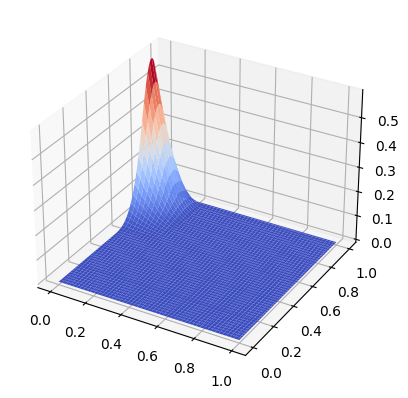

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
ax.plot_surface(XX,YY,ZZ,cmap=cm.coolwarm)
plt.show()

# Plotting a 2D basis using Paraview

Alternatively, we can use Paraview to plot a surface. Using `pygismo`'s built-in functions, this is an easy task:

In [18]:
gs.io.gsWriteParaview(tbasis,"output/basis",100000)

This creates the files `basisX.vts` with `X`$=0,...,N-1$ and `basis.pvd`. When we open `basis.pvd` in paraview, we see the full basis.